In [66]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math as ma


# Ejercicio 1
Se anuncia un corte de luz en su sector de la ciudad, por lo cual usted decide cargar 4 baterías para un cierto dispositivo electrónico. Los tiempos que tardan en cargarse son: 5 horas, 3 horas, 1 hora y 1 hora, y usted las va a cargar una después de otra en ese orden. Suponiendo que el
tiempo que tarda en cortarse la luz es una variable aleatoria exponencial de parémetro $\lambda= 6$, utilice simulación para calcular la cantidad media de baterías que quedan completamente cargadas antes del corte.

Notemos que $X\sim Exp (\lambda)$ y $\lambda=6$, donde $X$ denota la cantidad de horas hasta que haya un apagon por lo tanto $f_{x}(t)=\lambda e^{-\lambda  t} 1_{[0,\infty]}$, al ser una variable continua puedo decir que la media es:
$$
\int_{-\infty}^{\infty}x 6 e^{-6  x}1_{[0,\infty]}dx=6 \int_{-\infty}^{\infty}x e^{-6  x}1_{[0,\infty]}dx=6 \int_{0}^{\infty}x e^{-6  x}dx=\lim_{n \to \infty}\left. -\tfrac{x}{e^{6x}}-\tfrac{1}{6e^{6x}} \right|_{0}^{n}=0-(-\tfrac{0}{e^{0}}-\tfrac{1}{6e^{0}})=\tfrac{1}{6}
$$
Por lo tanto la media es $\tfrac{1}{6}$ de horas o $10$ mintuos, es decir, de media no se carga ninguna bateria

Ahora, para modelar este comportamiento haremos uso de la Función de probabilidad acumulada y su inversa.

 Entonces, sabemos la función de proba acumulada es $F(x)=z=1-e^{-6 x}$ donde $F:[0,\infty) → [0,1)$, entonces despejaremos x en función de z

 $1-z= e^{-6 x} \Longrightarrow -6 x = ln(1-z)\Longrightarrow x=\tfrac{ln(1-z)}{-6}$, donde $z\in [0,1)$

Una ves teniendo esto, dare valores pseudoaleatorios en el intervalo $[0,1)$ y apliicare esta función inversa para despues sacar promedio a estos números resultados de mi función

In [228]:
PP=[]
for _ in range (100):
  Num=[] #Lista donde agregare mis resultados de la función inversa
  for _ in range (500): #Seran 500 numeros pseudoaleatorios
    x=random.random() #Eligo un número entre 0 y 1
    if x==1: #Si es 1 lo omito y genero otro
      x=random.random()
    else: #SI no es 1 aplico la función inversa y agrego este número a mi lista Num
      y= np.log(1-x)/-6
      Num.append(y)
  PP.append(sum(Num)/len(Num))


In [223]:
print(PP)

[0.1683737934070809, 0.1862467433620824, 0.16121589433025396, 0.16324864715621176, 0.16630279785605104, 0.1689775626113614, 0.1475479452810138, 0.16214209875383792, 0.18734351394882157, 0.1663118328441316, 0.1775748678542555, 0.17188228168467293, 0.1709846093945674, 0.17512224901206364, 0.170022361173541, 0.16308108906779034, 0.1729785015592276, 0.17605923266695134, 0.1706462792216133, 0.16894871460617766, 0.1649442040843605, 0.17186480783549432, 0.15057407111730878, 0.16782103726434103, 0.16512027837820212, 0.17649747817411537, 0.1807811750624006, 0.17990799914990369, 0.15948998287212005, 0.15398338304515377, 0.17304248570875352, 0.17054298733796439, 0.15500352397852352, 0.15771595813622835, 0.1777804566058234, 0.1628031961678989, 0.17279399457335143, 0.1664929844162668, 0.15028790604216374, 0.15919231733165914, 0.17480933463769335, 0.1793738414478201, 0.17187393378913152, 0.16184960271225668, 0.17444749785096855, 0.16503438970952902, 0.16581496852127173, 0.15967313938499816, 0.166050

Podemos ver que el promedio resultante es muy parecido al promedio real ya que toma valores entre $0.15$ y $0.18$ aunque al ver la lista de promedios se puede ver que en su mayoria son elementos entre $0.16$ y $0-17$ lo cual se aproxima de buena manera al promedio real que era $\tfrac{1}{6}$

Y por lo tanto el promedio de la variable $X$ toma valores que se mantienen entre $0.15$ y $0.18$ lo cual representa aprox entre $9$ y $11$ minutos, lo que significa que en promedio ninguna bateria se alcanza a cargar por completo

# Ejercicio 2
Una distribución de probabilidad muy útil es la Distribución de Pareto, que debe su nombre al sociólogo, economista y filósofo italiano Vilfredo Pareto. Dado el parámetro de forma $\alpha > 0$ y de escala $k >0$, la función de densidad de  probabilidad de una variable $X$ con distribución de Pareto$(\alpha, k)$ está dada por
$$
f_X(x)= \frac{\alpha k^\alpha}{x^{\alpha + 1}}\mathbb{1}_{[k,+\infty)}(x).
$$

- Investigue que tipo de situaciones son modeladas usando esta distribución.
- Usando el teorema de la función inversa,
$$
F^{-1}_X(U)=X
$$
programa una función que simule una variable aleatoria con distribución Pareto. Recuerden que su función de distribución está dada por:
$$
F(x) =\Bigg \{ \begin{matrix} 0 \quad &si \quad x < k\\
1-\left(\frac{k}{x}\right)^{\alpha} \quad &si \quad x \ge k\\
\end{matrix}
$$


###### Hist clase

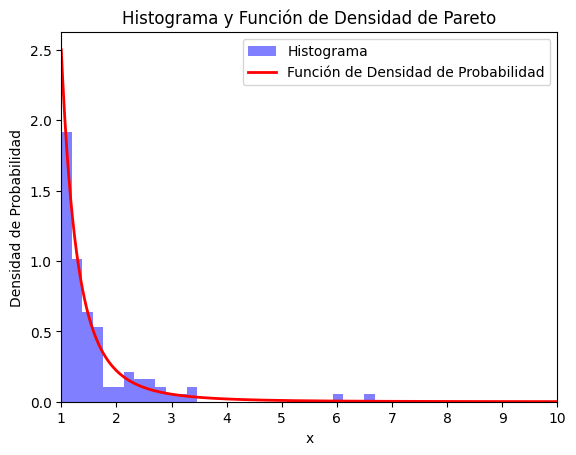

In [275]:


def pareto_inversa(alpha, k):
    u = random.random()
    return k * (1 - u)**(-1/alpha)

# Parámetros de forma y escala
alpha = 2.5
k = 1
num_muestras = 100
n = 10  # Cambia este valor a tu preferencia

# Generar muestras de la distribución de Pareto
muestras_pareto = [pareto_inversa(alpha, k) for _ in range(num_muestras)]

# Filtrar muestras para que estén por debajo de n
muestras_pareto = [x for x in muestras_pareto if x < n]

# Crear un rango de valores x hasta n
x = np.linspace(k, n, 1000)

# Calcular la función de densidad de probabilidad de Pareto
pdf_pareto = alpha * (k**alpha) / x**(alpha + 1)

# Crear histograma
plt.hist(muestras_pareto, bins=30, density=True, alpha=0.5, color='b', label='Histograma')

# Graficar la función de densidad de probabilidad
plt.plot(x, pdf_pareto, 'r-', lw=2, label='Función de Densidad de Probabilidad')

# Configurar límites del eje x
plt.xlim([k, n])

# Configuraciones del gráfico
plt.xlabel('x')
plt.ylabel('Densidad de Probabilidad')
plt.title('Histograma y Función de Densidad de Pareto')
plt.legend()

# Mostrar el gráfico
plt.show()


###### A)

In [225]:
def paretoacuminv(alpha,k,z): #Defino mi función de proba acumulada inversa
  x= k * (1 - z)**(-1/alpha)
  return x


In [246]:
def pareto(alpha,k,x): #Función de densidad
  if x>=k:
    y=alpha*(k**alpha)/x**(alpha+1)
    return y
  else:
    return 0

(3.0, 30.0)

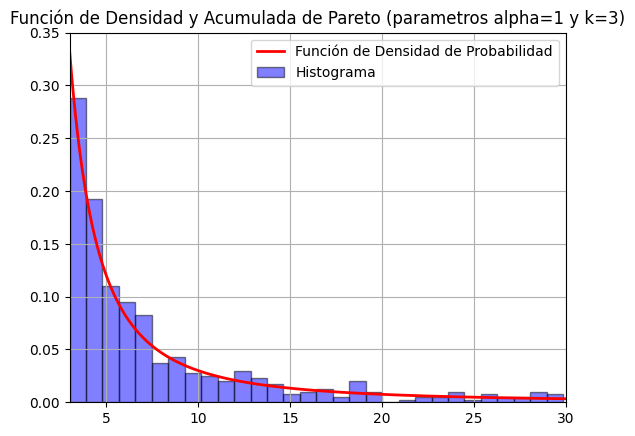

In [288]:
alpha=1
k=3
muestras=100 #Numero de muestras que tomare
n=30 #Mi cota superior de mi variable aleatoria
#Doy mis parametros

Zp=[random.random() for _ in range (500)]
Zp=[paretoacuminv(alpha,k,Zp[i]) for i in range (len(Zp))]
Zp=[x for x in Zp if x<n]
#Defino mi variable aleatorio con Montecarlo y quito aquellos valores que exceden mi cota

X=np.linspace(k, n, 1000)
Y=[pareto(alpha,k,X[i]) for i in range (len(X)) ]
#Calculo mi densidad de probabilidad para graficarla

plt.plot(X,Y,'r', lw=2, label='Función de Densidad de Probabilidad')
plt.hist(Zp, bins=30, density=True, alpha=0.5, color='b', label='Histograma',ec='black')
plt.title('Función de Densidad y Acumulada de Pareto (parametros alpha=1 y k=3)')
plt.legend()
plt.grid()
plt.xlim([k,n])

###### B)

Uno de los resultados más importantes en la teoria de la probabilidad es **la ley débil de los grandes números.** <br>
Lo que nos dice la ley débil de los grandes números es que si tenemos una sucesión de variables aleatorias $X_1 ,X_2 ,...,X_n$ independientes e identicamente distribuidas, entonces su promedio
$$
\lim_{n\rightarrow\infty}\frac{1}{n}\sum_{i=1}^nX_i\rightarrow E[X_i]
$$
**converge en probabilidad a la esperanza** de las variabales aleatorias cuando n tiende a infinito.<br>
En este ejercicio deberán programar una función que nos ayude a visualizar este resultado. <br>
Su función debera recibir:
- Una lista de valores
- Calcular los promedios parciales de estos datos
$$
S_k=\frac{1}{k}\sum_{i=1}^kx_i\qquad k\in\{1,..,N\}
$$
- Graficar los valores calculados de los promedios parciales.

Prueben su función generando una lista de 200 valores aleatorios provenientes de una distribición pareto(1,3),usando datos de una simulación. A tu gráfica anterior agregale la linea constante $y=\frac{\alpha k}{\alpha -1}=\frac{3}{2}$

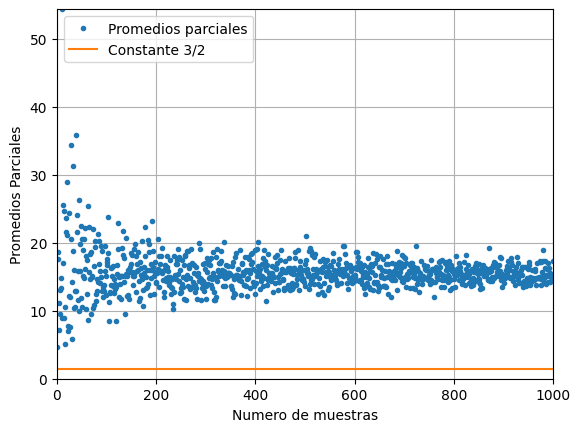

In [295]:
alpha=1
k=3
muestras=1000
n=500

A=[]#Lista donde agregare los promedios parciales
C=[]#Lista donde agregare las listas de donde obtuve los promedios parciales
for i in range (1,muestras+1): #Este sera el contador del numero de muestras
  Z=[random.random() for j in range (i)] #Elijo i muestras entre 0 y 1
  Z=[paretoacuminv(alpha,k,Z[x]) for x in range (len(Z))] #Les aplico la acumulada inversa saber que valor toma cada variable
  Z=[x for x in Z if x<n] #Acotare los valores en Z para eliminar los elementos demasiado alejados que pueden afectar mi promedio bastante
  z=sum(Z)/len(Z) #Obtengo el promedio parcial de mis valores
  C.append(Z) #Agrego mi lista de valores a C y mi promedio a A
  A.append(z)
B=[i+1 for i in range (len(A))] #Esta sera la lista que contabilizara el numero de muestras para graficae

plt.plot(B,A,'.',label='Promedios parciales')
plt.plot([0,muestras],[3/2,3/2],label='Constante 3/2')
#Grafico los promedios parciales respecto al numero de muestras
plt.ylim([0,max(A)])
plt.xlim([0,muestras])
plt.xlabel('Numero de muestras')
plt.ylabel('Promedios Parciales')
plt.legend(loc='upper left')
plt.grid()

# Ejercicio 3
En el ejercicio 2 de la práctica 1, estudiamos la relación entre el diametro y la altura de cierto tipo de pino.  Supongamos ahora que el diámetro $D$ es una variable aleatoria, con densidad de probabilidad
$$ f_{D}(x)=\frac{x}{1250}\mathbb{1}_{(0,50)}\left( x\right) $$
Tomando en cuenta la relación encontrada en el ejercicio 2, utilice el metodo de Montecarlo para aproximar vía histogramas la gráfica de la densidad de probabilidad de la altura de los pinos, y aproximar la altura media de dichos arboles.

Como sabemos que $f_{D}(x)=\tfrac {x}{1250} 1_{(0,50)}(x)$ entonces

$F(x)=∫_{0}^{x} \tfrac {u}{1250} du=\tfrac{1}{1250}∫_{0}^{x} u du=\tfrac{1}{1250} * (\tfrac{x^{2}}{2})=\tfrac{x^{2}}{2500}$

Para usar Montecarlo primero obtendremos la función inversa de la acumulada es decir

$F(x)=z \Longrightarrow \tfrac{x^{2}}{2500}=z \Longrightarrow x^{2}=z*2500\Longrightarrow x=\sqrt{z*2500}$ donde $z\in [0,1]$

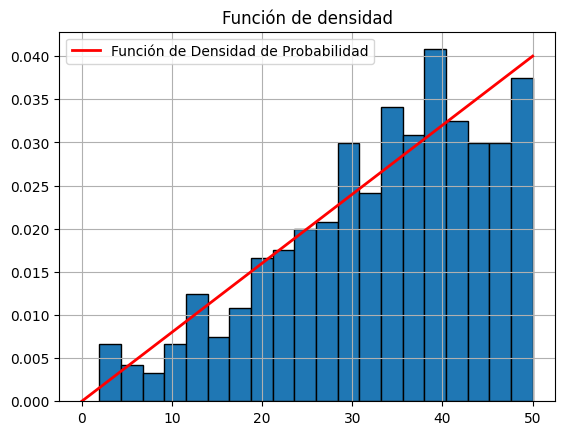

In [306]:
X3=np.linspace(0,50,100)
Y3=[X3[i]/1250 for i in range (len(X3))]
#Grafico mi función de densidad

Z3=[random.random() for _ in range (500)]
Z3=[(Z3[i]*2500)**(1/2) for i in range (len(Z3))]
#Genero 500 números pseudoaleatorios y les aplico mi inversa de mi función de Proba acumulada

plt.plot(X3,Y3,'r', lw=2, label='Función de Densidad de Probabilidad')
plt.hist(Z3, bins=20 , density=True,ec='black')
#Grafico el histograma y mi función de densidad
plt.title('Función de densidad')
plt.legend()
plt.grid()

Una ves tiendiendo esto obtendremos la media real y compararemos con la media de nuestro modelo, la media de una variable continua es

$$
∫_{-\infty}^{\infty}uf_{D}(u) 1_{(0,50)}(u)du=∫_{0}^{50}uf_{D}(u)du=∫_{0}^{50}\tfrac{x^{2}}{1250}du=\tfrac{100}{3}
$$

In [308]:
Prom=sum(Z3)/len(Z3) #Cálculo el promedio
print(f'El promedio obtenido fue de {Prom} con {len(Z3)} muestras, con un error respecto al promedio real de {(100/3)-Prom}')

El promedio obtenido fue de 33.246720952965696 con 500 muestras, con un error respecto al promedio real de 0.08661238036764018
